In [37]:
!pip install pyodbc
!pip install pandas
!pip install squarify

In [38]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sqlalchemy import create_engine
import urllib
import warnings

import squarify

# Defining the connection string


In [3]:
server = 'Shiwam\SQLEXPRESS'
database = 'BankLoan DB'
cnn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes;')
cursor = cnn.cursor()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\shiwa\AppData\Local\Temp\ipykernel_20412\2884370732.py:1: SyntaxWarning: invalid escape sequence '\S'
  server = 'Shiwam\SQLEXPRESS'


# Importing data into pandas DataFrame from connected SQL Server

In [4]:
# SQL query to import data from the database.
# query = "SELECT * FROM bank_loan_data"

df = pd.read_sql_query("SELECT * FROM bank_loan_data", cnn)


C:\Users\shiwa\AppData\Local\Temp\ipykernel_20412\1621250162.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM bank_loan_data", cnn)


In [5]:
# Display the first 5 rows of the DataFrame to verify the import
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,54734,CA,INDIVIDUAL,< 1 year,None,B,RENT,2021-08-09,2021-08-12,2021-10-11,...,B4,36 months,Verified,85000.0,0.1948,829.099976,0.1189,25000,42,29330
1,55742,NY,INDIVIDUAL,< 1 year,CNN,B,RENT,2021-05-08,2021-08-12,2021-06-11,...,B5,36 months,Not Verified,65000.0,0.1429,228.220001,0.1071,7000,7,8216
2,57245,TX,INDIVIDUAL,10+ years,city of beaumont texas,C,OWN,2021-03-10,2021-05-16,2021-03-13,...,C2,36 months,Not Verified,54000.0,0.0547,40.500000,0.1311,1200,31,1458
3,57416,CT,INDIVIDUAL,6 years,State Farm Insurance,C,RENT,2021-11-09,2021-05-16,2021-11-12,...,C3,36 months,Not Verified,32000.0,0.1163,366.859985,0.1357,10800,40,13208
4,58915,CA,INDIVIDUAL,3 years,QUalcomm Inc,B,RENT,2021-04-08,2021-03-14,2021-04-11,...,B3,36 months,Not Verified,85000.0,0.0810,162.339996,0.1008,7500,11,5844


# Informations about the data set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37143 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [7]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.449997,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.044998,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442497,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.189941,0.245900,35000.000000,90.000000,58564.000000


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
# to get all the column names
df.columns 


Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [10]:
# .unique() will search the entire column and give you the unique element.
df['id'].unique() 

array([  54734,   55742,   57245, ..., 1077175, 1077430, 1077501],
      dtype=int64)

In [11]:
# shape of the dataframe
df.shape 

(38576, 24)

In [12]:
# Check for missing values
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1433
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

#  Data Cleaning and Preparation

In [13]:
# Converting 'issue_date' to a datetime object
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y')



In [14]:
# Defining 'Good Loan' and 'Bad Loan' categories
good_loan_status = ['Fully Paid', 'Current']
bad_loan_status = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)']



In [15]:
# Creating new columns to classify loans
df['loan_category'] = df['loan_status'].apply(lambda x: 'Good Loan' if x in good_loan_status else ('Bad Loan' if x in bad_loan_status else 'Other'))


In [16]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_category
0,54734,CA,INDIVIDUAL,< 1 year,None,B,RENT,2021-08-09,2021-08-12,2021-10-11,...,36 months,Verified,85000.0,0.1948,829.099976,0.1189,25000,42,29330,Good Loan
1,55742,NY,INDIVIDUAL,< 1 year,CNN,B,RENT,2021-05-08,2021-08-12,2021-06-11,...,36 months,Not Verified,65000.0,0.1429,228.220001,0.1071,7000,7,8216,Good Loan
2,57245,TX,INDIVIDUAL,10+ years,city of beaumont texas,C,OWN,2021-03-10,2021-05-16,2021-03-13,...,36 months,Not Verified,54000.0,0.0547,40.500000,0.1311,1200,31,1458,Good Loan
3,57416,CT,INDIVIDUAL,6 years,State Farm Insurance,C,RENT,2021-11-09,2021-05-16,2021-11-12,...,36 months,Not Verified,32000.0,0.1163,366.859985,0.1357,10800,40,13208,Good Loan
4,58915,CA,INDIVIDUAL,3 years,QUalcomm Inc,B,RENT,2021-04-08,2021-03-14,2021-04-11,...,36 months,Not Verified,85000.0,0.0810,162.339996,0.1008,7500,11,5844,Good Loan


# Analyzing and SQL query

## KPI Calculations

## 1. Summary

In [17]:
# Calculating Total Loan Applications
total_loan_applications = df.shape[0]

# Calculating Total Funded Amount
total_funded_amount = df['loan_amount'].sum()

# Calculating Total Amount Received
total_amount_received = df['total_payment'].sum()

# Calculating Average Interest Rate
avg_interest_rate = df['int_rate'].mean()

# Calculating Average DTI (Debt-to-Income)
avg_dti = df['dti'].mean()

print("--- Summary KPIs ---")
print(f"Total Loan Applications: {total_loan_applications}")
print(f"Total Funded Amount: ${total_funded_amount:,.2f}")
print(f"Total Amount Received: ${total_amount_received:,.2f}")
print(f"Average Interest Rate: {avg_interest_rate:.2%}")
print(f"Average DTI: {avg_dti:.2f}")

--- Summary KPIs ---
Total Loan Applications: 38576
Total Funded Amount: $435,757,075.00
Total Amount Received: $473,070,933.00
Average Interest Rate: 12.05%
Average DTI: 0.13


## 2. Good Loan

In [18]:
# Filtering the DataFrame for good loans
good_loan_df = df[df['loan_category'] == 'Good Loan']

# Calculating Good Loan Percentage
total_good_loans = good_loan_df.shape[0]
good_loan_percentage = (total_good_loans / total_loan_applications) * 100

# Calculating Good Loan Funded Amount
good_loan_funded_amount = good_loan_df['loan_amount'].sum()

# Calculating Good Loan Received Amount
good_loan_amount_received = good_loan_df['total_payment'].sum()

print("\n--- Good Loan KPIs ---")
print(f"Good Loan Percentage: {good_loan_percentage:.2f}%")
print(f"Total Good Loan Applications: {total_good_loans}")
print(f"Total Good Loan Funded Amount: ${good_loan_funded_amount:,.2f}")
print(f"Total Good Loan Amount Received: ${good_loan_amount_received:,.2f}")


--- Good Loan KPIs ---
Good Loan Percentage: 86.18%
Total Good Loan Applications: 33243
Total Good Loan Funded Amount: $370,224,850.00
Total Good Loan Amount Received: $435,786,170.00


## 3. Bad Loan 

In [19]:
# Filtering the DataFrame for bad loans
bad_loan_df = df[df['loan_category'] == 'Bad Loan']

# Calculating Bad Loan Percentage
total_bad_loans = bad_loan_df.shape[0]
bad_loan_percentage = (total_bad_loans / total_loan_applications) * 100



# Calculating Bad Loan Funded Amount
bad_loan_funded_amount = bad_loan_df['loan_amount'].sum()

# Calculating Bad Loan Received Amount
bad_loan_amount_received = bad_loan_df['total_payment'].sum()

print("\n--- Bad Loan KPIs ---")
print(f"Bad Loan Percentage: {bad_loan_percentage:.2f}%")
print(f"Total Bad Loan Applications: {total_bad_loans}")
print(f"Total Bad Loan Funded Amount: ${bad_loan_funded_amount:,.2f}")
print(f"Total Bad Loan Amount Received: ${bad_loan_amount_received:,.2f}")


--- Bad Loan KPIs ---
Bad Loan Percentage: 13.82%
Total Bad Loan Applications: 5333
Total Bad Loan Funded Amount: $65,532,225.00
Total Bad Loan Amount Received: $37,284,763.00


## 4. Time-Series Analysis

In [20]:
# Creating a DataFrame for time-series analysis
monthly_data = df.groupby('issue_date').agg(
    Total_Loan_Applications=('id', 'count'),
).reset_index().sort_values('issue_date')

# Calculating Month-over-Month (MoM) changes for MoM_Applications_Change:
monthly_data['MoM_Total_Loan_Applications'] = monthly_data['Total_Loan_Applications'].pct_change() * 100

print("MoM_Total_Loan_Applications:")
print(monthly_data)

MoM_Total_Loan_Applications:
   issue_date  Total_Loan_Applications  MoM_Total_Loan_Applications
0  2021-01-01                        2                          NaN
1  2021-01-05                        1                   -50.000000
2  2021-01-08                      171                 17000.000000
3  2021-01-09                      239                    39.766082
4  2021-01-10                      583                   143.933054
..        ...                      ...                          ...
60 2021-12-08                      222                   161.176471
61 2021-12-09                      597                   168.918919
62 2021-12-10                     1220                   104.355109
63 2021-12-11                     2188                    79.344262
64 2021-12-12                        1                   -99.954296

[65 rows x 3 columns]


In [21]:
# Creating a DataFrame for time-series analysis
monthly_data = df.groupby('issue_date').agg(
    Total_Funded_Amount = ('loan_amount', 'sum'),
).reset_index().sort_values('issue_date')

# Calculating Month-over-Month (MoM) changes for Total_Funded_Amount
monthly_data['MoM_Total_Funded_Amount'] = monthly_data['Total_Funded_Amount'].pct_change() * 100

print("MoM_Total_Funded_Amount:")
print(monthly_data)

MoM_Total_Funded_Amount:
   issue_date  Total_Funded_Amount  MoM_Total_Funded_Amount
0  2021-01-01                 6500                      NaN
1  2021-01-05                12000                84.615385
2  2021-01-08              1761050             14575.416667
3  2021-01-09              2186225                24.143267
4  2021-01-10              6540475               199.167515
..        ...                  ...                      ...
60 2021-12-08              2289500               132.159607
61 2021-12-09              6485825               183.285652
62 2021-12-10             13345500               105.764109
63 2021-12-11             30866375               131.286763
64 2021-12-12                 5000               -99.983801

[65 rows x 3 columns]


In [22]:
# Creating a DataFrame for time-series analysis
monthly_data = df.groupby('issue_date').agg(
    Total_Amount_Received=('total_payment', 'sum')
).reset_index().sort_values('issue_date')

# Calculating Month-over-Month (MoM) changes for key metrics
monthly_data['MoM_Total_Amount_Received'] = monthly_data['Total_Amount_Received'].pct_change() * 100

print("MoM_Total_Amount_Received:")
print(monthly_data)

MoM_Total_Amount_Received:
   issue_date  Total_Amount_Received  MoM_Total_Amount_Received
0  2021-01-01                   7774                        NaN
1  2021-01-05                   3522                 -54.695138
2  2021-01-08                1794520               50851.731970
3  2021-01-09                2387251                  33.030058
4  2021-01-10                7143595                 199.239376
..        ...                    ...                        ...
60 2021-12-08                2299219                 138.090549
61 2021-12-09                7221725                 214.094699
62 2021-12-10               14010631                  94.006709
63 2021-12-11               33567713                 139.587446
64 2021-12-12                   5863                 -99.982534

[65 rows x 3 columns]


# Detailed Breakdown Analyses

In [23]:
# Loan Status Breakdown (reproduces the SQL query)
loan_status_df = df.groupby('loan_status').agg(
    Total_Loan_Applications=('id', 'count'),
    Total_Funded_Amount=('loan_amount', 'sum'),
    Total_Amount_Received=('total_payment', 'sum')
).reset_index()

print("\nLoan Status Breakdown:")
print(loan_status_df)





Loan Status Breakdown:
   loan_status  Total_Loan_Applications  Total_Funded_Amount  \
0  Charged Off                     5333             65532225   
1      Current                     1098             18866500   
2   Fully Paid                    32145            351358350   

   Total_Amount_Received  
0               37284763  
1               24199914  
2              411586256  


In [24]:
# Grade and Sub Grade Analysis (reproduces the SQL query)
grade_df = df.groupby(['grade', 'sub_grade']).agg(
    Total_Loan_Applications=('id', 'count'),
    Total_Funded_Amount=('loan_amount', 'sum'),
    Total_Amount_Received=('total_payment', 'sum')
).reset_index()

print("\nGrade and Sub Grade Analysis:")
print(grade_df)





Grade and Sub Grade Analysis:
   grade sub_grade  Total_Loan_Applications  Total_Funded_Amount  \
0      A        A1                     1052              7693100   
1      A        A2                     1440             10620475   
2      A        A3                     1740             13727700   
3      A        A4                     2803             26426425   
4      A        A5                     2654             25784525   
5      B        B1                     1751             17260875   
6      B        B2                     1990             21144550   
7      B        B3                     2834             33061350   
8      B        B4                     2455             28296300   
9      B        B5                     2644             30940900   
10     C        C1                     2089             23497800   
11     C        C2                     1972             22649200   
12     C        C3                     1490             16274575   
13     C        C

In [25]:
# Purpose Breakdown (reproduces the SQL query)
purpose_df = df.groupby('purpose').agg(
    Total_Loan_Applications=('id', 'count'),
    Total_Funded_Amount=('loan_amount', 'sum'),
    Total_Amount_Received=('total_payment', 'sum')
).reset_index()

print("\nPurpose Breakdown:")
print(purpose_df)





Purpose Breakdown:
               purpose  Total_Loan_Applications  Total_Funded_Amount  \
0   Debt consolidation                    18214            232459675   
1                  car                     1497             10223575   
2          credit card                     4998             58885175   
3          educational                      315              2161650   
4     home improvement                     2876             33350775   
5                house                      366              4824925   
6       major purchase                     2110             17251600   
7              medical                      667              5533225   
8               moving                      559              3748125   
9                other                     3824             31155750   
10    renewable_energy                       94               845750   
11      small business                     1776             24123100   
12            vacation                      

In [26]:
# Home Ownership Analysis (reproduces the SQL query)
home_ownership_df = df.groupby('home_ownership').agg(
    Total_Loan_Applications=('id', 'count'),
    Total_Funded_Amount=('loan_amount', 'sum'),
    Total_Amount_Received=('total_payment', 'sum')
).reset_index()

print("\nHome Ownership Analysis:")
print(home_ownership_df)


Home Ownership Analysis:
  home_ownership  Total_Loan_Applications  Total_Funded_Amount  \
0       MORTGAGE                    17198            219329150   
1           NONE                        3                16800   
2          OTHER                       98              1044975   
3            OWN                     2838             29597675   
4           RENT                    18439            185768475   

   Total_Amount_Received  
0              238474438  
1                  19053  
2                1025257  
3               31729129  
4              201823056  


In [27]:
df.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,loan_category
0,54734,CA,INDIVIDUAL,< 1 year,None,B,RENT,2021-08-09,2021-08-12,2021-10-11,...,36 months,Verified,85000.0,0.1948,829.099976,0.1189,25000,42,29330,Good Loan
1,55742,NY,INDIVIDUAL,< 1 year,CNN,B,RENT,2021-05-08,2021-08-12,2021-06-11,...,36 months,Not Verified,65000.0,0.1429,228.220001,0.1071,7000,7,8216,Good Loan
2,57245,TX,INDIVIDUAL,10+ years,city of beaumont texas,C,OWN,2021-03-10,2021-05-16,2021-03-13,...,36 months,Not Verified,54000.0,0.0547,40.500000,0.1311,1200,31,1458,Good Loan
3,57416,CT,INDIVIDUAL,6 years,State Farm Insurance,C,RENT,2021-11-09,2021-05-16,2021-11-12,...,36 months,Not Verified,32000.0,0.1163,366.859985,0.1357,10800,40,13208,Good Loan
4,58915,CA,INDIVIDUAL,3 years,QUalcomm Inc,B,RENT,2021-04-08,2021-03-14,2021-04-11,...,36 months,Not Verified,85000.0,0.0810,162.339996,0.1008,7500,11,5844,Good Loan


# Data Visualization

## Summary Charts

In [28]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment', 'loan_category'],
      dtype='object')

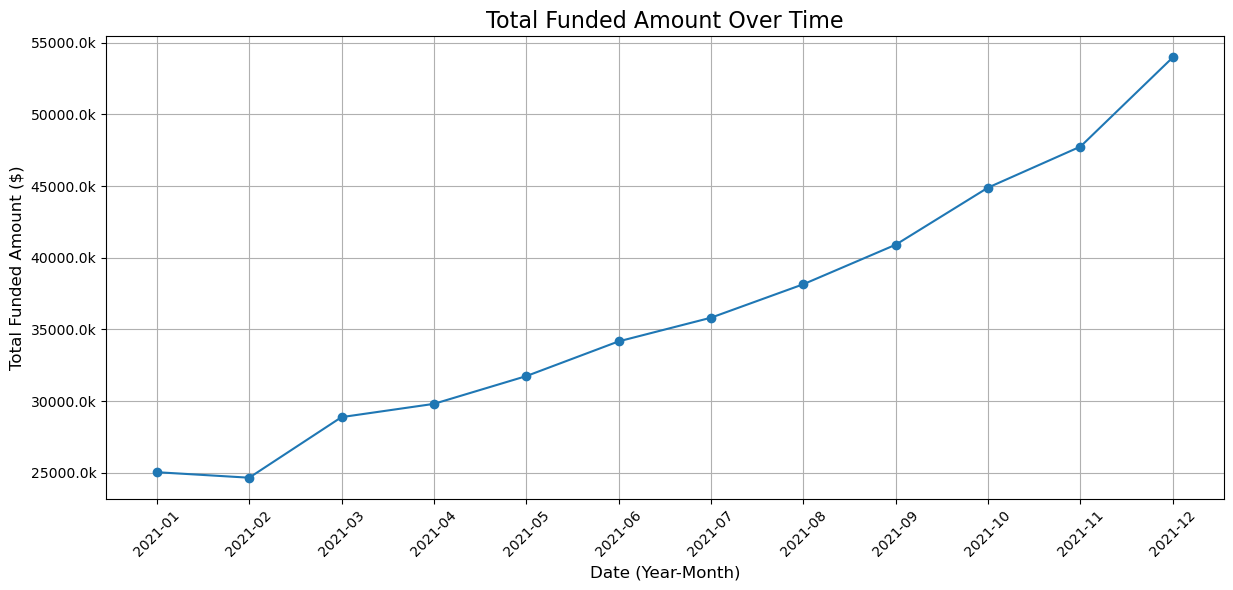

In [49]:
# Group data by month and sum the loan amounts
df['issue_month_year'] = df['issue_date'].dt.to_period('M')
monthly_funded_amount = df.groupby('issue_month_year')['loan_amount'].sum().reset_index()
monthly_funded_amount['issue_month_year'] = monthly_funded_amount['issue_month_year'].astype(str)

# Plot the time series
plt.figure(figsize=(12, 6))

# Use ax object for more control over the axes
ax = plt.gca()

# Plot the data
plt.plot(monthly_funded_amount['issue_month_year'], monthly_funded_amount['loan_amount'], marker='o', linestyle='-')

# Add labels and a title
plt.title('Total Funded Amount Over Time', fontsize=16)
plt.xlabel('Date (Year-Month)', fontsize=12)
plt.ylabel('Total Funded Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Import the necessary formatter from matplotlib
from matplotlib.ticker import FuncFormatter

# Define a function to format the y-axis labels
def thousands_formatter(x, pos):
    """The function to be used for formatting y-axis labels."""
    return f'{x / 1000:.1f}k'

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Save the figure
plt.savefig('total_funded_amount_over_time.png')
plt.show()

### Loan Status Distribution 

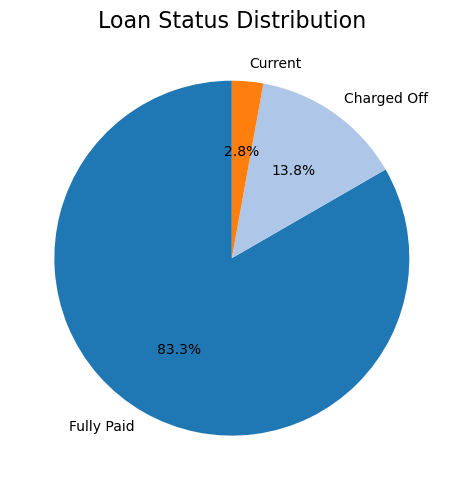

In [32]:
# Get counts of each loan status
loan_status_counts = df['loan_status'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 5))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

# Add a title
plt.title('Loan Status Distribution', fontsize=16)
plt.tight_layout()

# Save the figure
plt.savefig('loan_status_distribution.png')
plt.show()

## Loan Details by Category

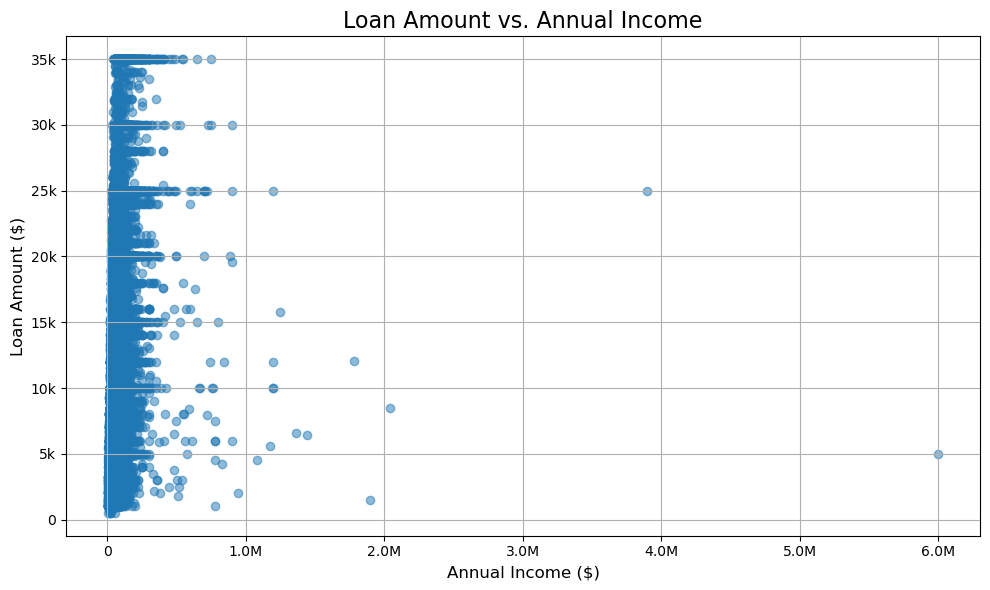

In [50]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
ax = plt.gca() # Get the current axes to customize

# Plot the data
plt.scatter(df['annual_income'], df['loan_amount'], alpha=0.5)

# Define a function to format the numbers with 'k' or 'M'
def money_formatter(x, pos):
    """
    Formats the tick values to show in thousands (k) or millions (M)
    for better readability.
    """
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x / 1_000:.0f}k'
    return f'{x:.0f}'

# Apply the formatter to both the x-axis and y-axis
ax.xaxis.set_major_formatter(FuncFormatter(money_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(money_formatter))

# Add labels and title
plt.title('Loan Amount vs. Annual Income', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Loan Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('loan_amount_vs_annual_income.png')
plt.show()

## Purpose Breakdown (Bar Chart)

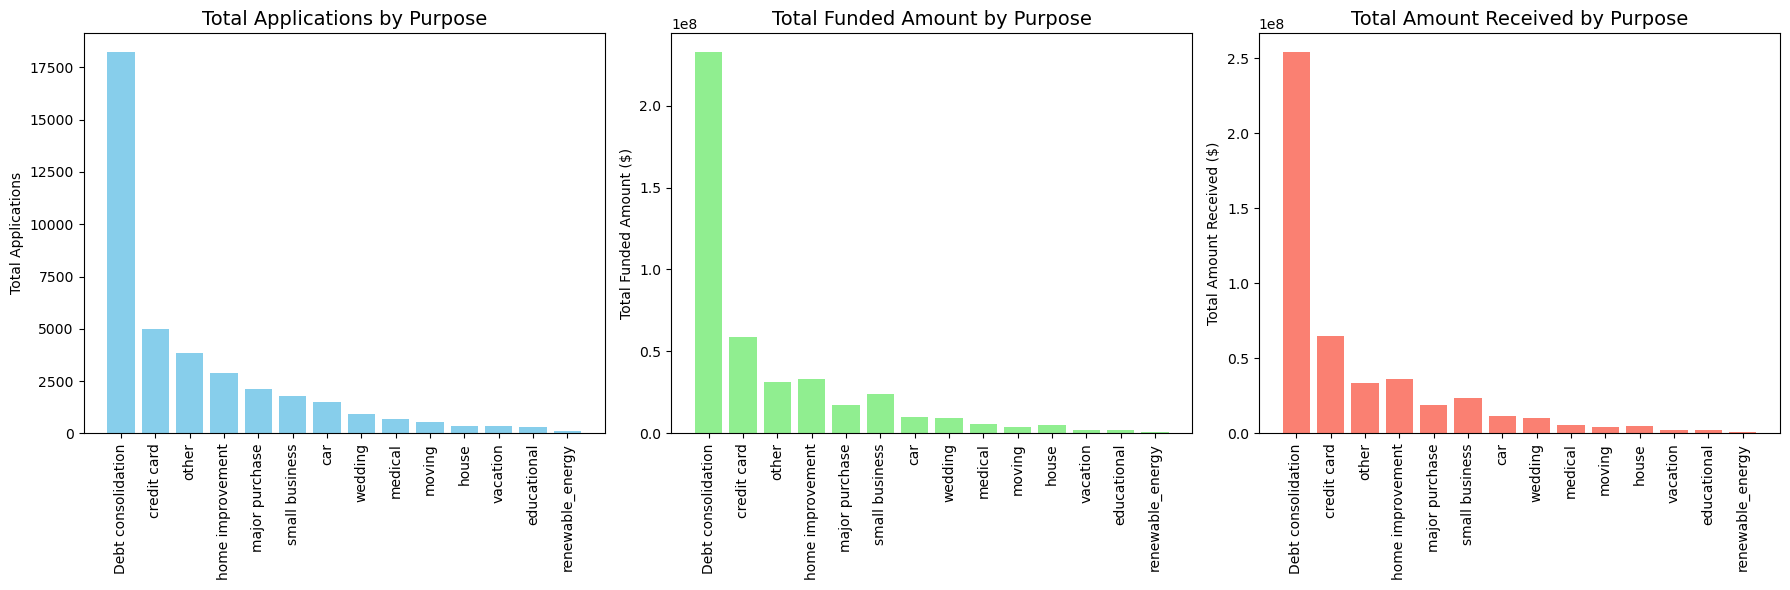

In [55]:


# Group data by 'purpose' and calculate total metrics
purpose_summary = df.groupby('purpose').agg(
    Total_Applications=('id', 'count'),
    Total_Funded_Amount=('loan_amount', 'sum'),
    Total_Amount_Received=('total_payment', 'sum')
).reset_index().sort_values('Total_Applications', ascending=False)



# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)


# Plotting Total Applications
axes[0].bar(purpose_summary['purpose'], purpose_summary['Total_Applications'], color='skyblue')
axes[0].set_title('Total Applications by Purpose', fontsize=14)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Total Applications')

# Plotting Total Funded Amount
axes[1].bar(purpose_summary['purpose'], purpose_summary['Total_Funded_Amount'], color='lightgreen')
axes[1].set_title('Total Funded Amount by Purpose', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('Total Funded Amount ($)')

# Plotting Total Amount Received
axes[2].bar(purpose_summary['purpose'], purpose_summary['Total_Amount_Received'], color='salmon')
axes[2].set_title('Total Amount Received by Purpose', fontsize=14)
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_ylabel('Total Amount Received ($)')

plt.tight_layout()

# Save the figure
plt.savefig('purpose_breakdown_bar_chart.png')
plt.show()

## Home Ownership Analysis

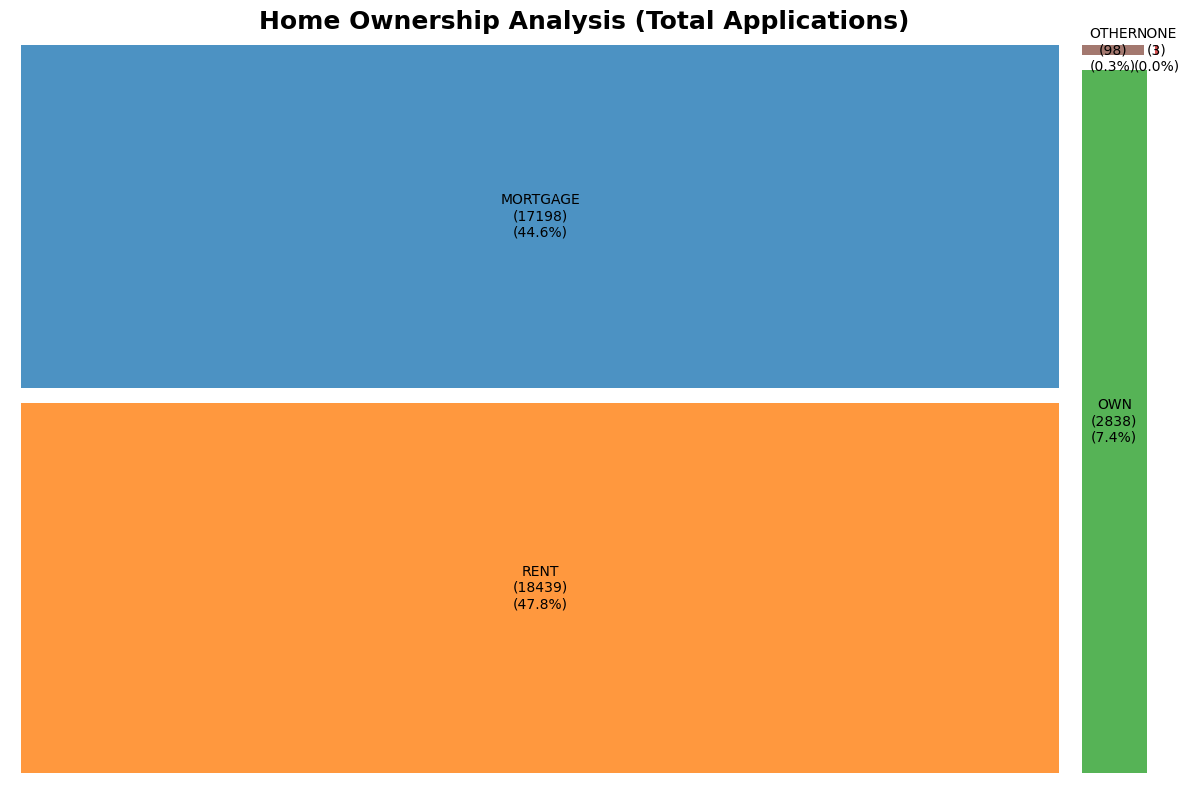

In [48]:
# Grouping data by 'home_ownership' and count total applications
home_ownership_counts = df['home_ownership'].value_counts()

# Calculating the total number of applications to determine percentages
total_applications = home_ownership_counts.sum()

# Defining specific colours for each category for a professional look
color_mapping = {
    'MORTGAGE': '#1f77b4',  # A shade of blue
    'RENT': '#ff7f0e',      # A shade of orange
    'OWN': '#2ca02c',       # A shade of green
    'NONE': '#d62728',      # A shade of red
    'OTHER': '#8c564b'      # A shade of brown
}

# Creating a list of colors based on the order of the grouped data
colors = [color_mapping.get(category, '#7f7f7f') for category in home_ownership_counts.index]

# Creating professional labels with category, count, and percentage
labels = [
    f"{category}\n({count})\n({(count / total_applications):.1%})"
    for category, count in home_ownership_counts.items()
]

# Creating the treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=home_ownership_counts.values,
    label=labels,
    color=colors,
    alpha=0.8,
    pad=True  # Add padding for better visualisation
)

# Adding a title
plt.title('Home Ownership Analysis (Total Applications)', fontsize=18, fontweight='bold')
plt.axis('off')  # Turn off the axis for a cleaner look
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Saving the figure with a high resolution
plt.savefig('home_ownership_treemap_professional.png', dpi=300)
plt.show()

# Preserving the results

In [56]:
pip install pyodbc sqlalchemy

In [57]:
from sqlalchemy import create_engine
import urllib